# Week 7 Seminar: Logistic Regression

Today we are going to apply what we have learned to logistic regression, first with some invented data and then with some real text

First we will generate some random data for an imagined sentiment classification task with only two features. We can think of our two features as being the log of the counts of positive words (e.g. good, excellent) and the log of the counts of negative words (e.g. bad, rubbish). The label we are trying to predict is either 1 (positive sentiment text) or 0 (negative sentiment text).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Create simulated data
np.random.seed(10)
w1_center = (2, 3)
w2_center = (3, 2)
batch_size=50

x = np.zeros((batch_size, 2))
y = np.zeros(batch_size)
for i in range(batch_size):
    if np.random.random() > 0.5:
        x[i] = np.random.normal(loc=w1_center)
    else:
        x[i] = np.random.normal(loc=w2_center)
        y[i] = 1

x=x.T

We can visualise the data as follows. The stars are the positive sentiment texts, the circles are the negative sentiment texts.

(0.0, 5.0)

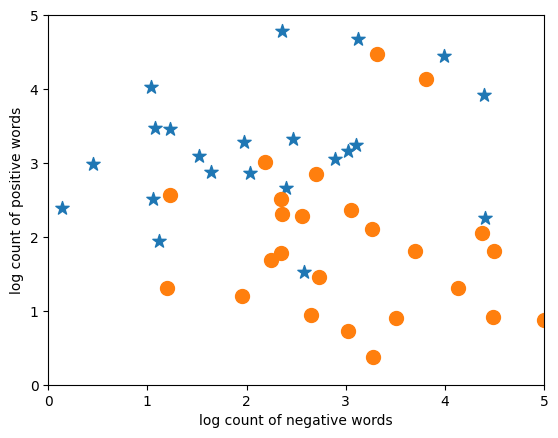

In [3]:
plt.scatter(x[0][y==0], x[1][y==0], marker='*', s=100)
plt.scatter(x[0][y==1], x[1][y==1], marker='o', s=100)
plt.xlabel("log count of negative words")
plt.ylabel("log count of positive words")
plt.xlim((0,5))
plt.ylim((0,5))


To see why we might to take the log, we can exponentiate the log counts (reversing the log function) to give raw counts. These are worse for visualisation and modelling purposes

(0.0, 150.0)

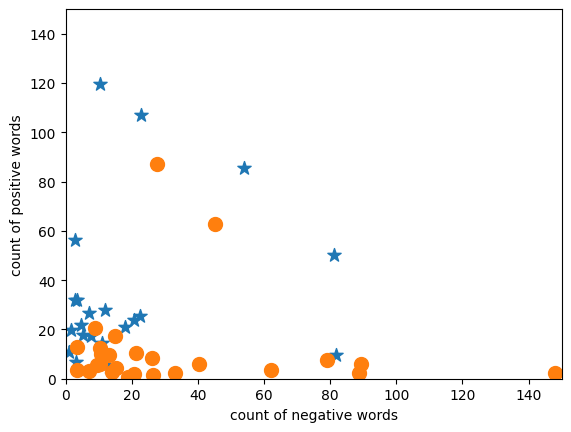

In [4]:
x_exp=np.exp(x)
plt.scatter(x_exp[0][y==0], x_exp[1][y==0], marker='*', s=100)
plt.scatter(x_exp[0][y==1], x_exp[1][y==1], marker='o', s=100)
plt.xlabel("count of negative words")
plt.ylabel("count of positive words")
plt.xlim((0,150))
plt.ylim((0,150))

Our goal in logistic regression is to find a line that allows us to estimate a probability that any text has positive sentiment. It that probability is greater than 0.5 then we will say that it is a positive text and if lower then we will say it is a negative text.

In logistic regression we first estimate our value z as a linear function of our predictors, just as in linear regression:

$y_{i} = bias + x1_{i}*weight1 + x2_{i}*weight2$

We then use the sigmoid function to convert this z values to a probability:

$p(y_{i}=1) = \frac{1}{1+e^{-z}}$


We can start by setting some random weights and an arbitrary bias.

In [17]:
np.random.seed(10)
num_features=2
weights = np.random.rand(num_features)
bias=0

We can add this line to our plot of values. It should cut across the items so that items that are above the line should be mostly positive sentiment texts and those that are below should be negative sentiment texts.

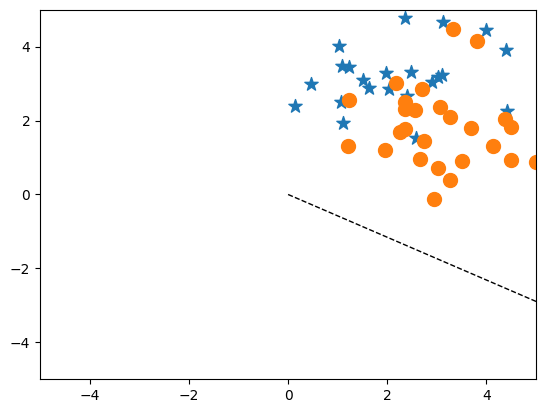

In [10]:
plt.scatter(x[0][y==0], x[1][y==0], marker='*', s=100)
plt.scatter(x[0][y==1], x[1][y==1], marker='o', s=100)
plt.xlim((-5,5))
plt.ylim((-5,5))
c = -bias/weights[1]
m = -weights[0]/weights[1]
xmin, xmax = 0, 5
ymin, ymax = 0, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

Our random line does not do this. So we will use gradient descent to find the line of best fit.

For logistic regression we use a cross entropy loss function. I have included this in the code (See lecture for details).

To calculate the gradient of the loss function with respect to the bias term we first calculate the difference between each predicted y value and the true y value. We then take the average difference by summing the differences and dividing the result by N - the number of data points in our data:

$\delta b = \frac{1}{N} * \sum_{i=1}^{N} q_{i} - y_{i} $

To calculate the gradient of the loss function with respect to each weight, we again first calculate the difference between each predicted y value and the true y value. We then calculate the dot product of this vector and the vector of x values for the relevant feature and divide the result by N - the number of data points in our data:

$\delta w = \frac{1}{N} * \sum_{i=1}^{N} x[i] * q_{i} - y_{i} $

x here is vector of values for the feature relevant to the individual weight. A different gradient is needed for each weight and this will be calculated using a different x.


Problem 1: Complete code below so that it finds the line of best fit. \\

Note: For the sigmoid function you will need to exponentiate -z. You can do this using the function np.exp(-z).

In [12]:
z=1.5
# This:
pow(np.e,-z)
# Is the same as this:
np.exp(-z)

0.22313016014842982

Text(0, 0.5, 'loss')

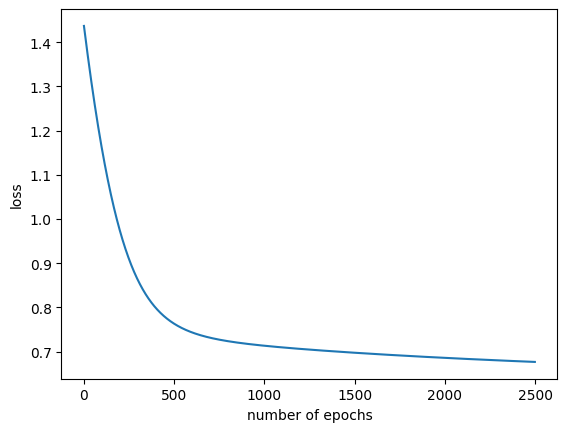

In [26]:
np.random.seed(10)
num_features=2
weights = np.random.rand(num_features)
bias=0

n_iters = 2500
num_features = 2
num_samples = len(y)
lr=0.001
logistic_loss=[]

for i in range(n_iters):
    #z=x[0]*weights[0] + x[1]*weights[1] + bias
    z=weights.dot(x) + bias
    q = 1/(1+np.exp(-z))
    loss = sum(-(y*np.log2(q)+(1-y)*np.log2(1-q)))/num_samples
    logistic_loss.append(loss)
    dw1 = sum(x[0]*(q-y))/num_samples
    dw2 = sum(x[1]*(q-y))/num_samples
    db = sum(q-y)/num_samples
    weights[0] = weights[0] - dw1*lr
    weights[1] = weights[1] - dw2*lr
    bias = bias - db*lr
plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

Once this is working we can add the resulting line to our data and it should separate the two classes of items.

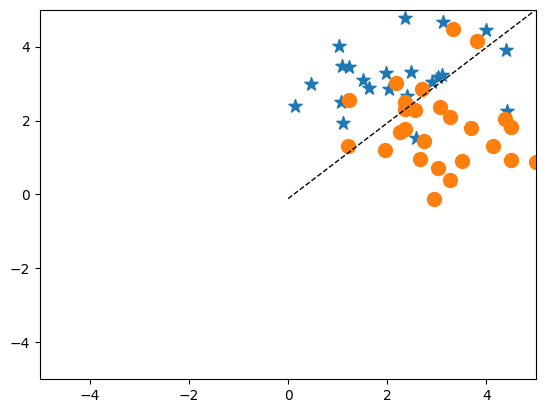

In [15]:
plt.scatter(x[0][y==0], x[1][y==0], marker='*', s=100)
plt.scatter(x[0][y==1], x[1][y==1], marker='o', s=100)
plt.xlim((-5,5))
plt.ylim((-5,5))
c = -bias/weights[1]
m = -weights[0]/weights[1]
xmin, xmax = 0, 5
ymin, ymax = -5, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

Problem 2: Calculate p(y=1) for a) a text that contains two positive words and 3 negative words and b) a text that contains 10 positive words and 1 negative word.

To calculate this you will need to know the bias and the weight which are as follows. You will also need to use the sigmoid function.

In [20]:
print("BIAS: " + str(bias))
print("WEIGHT 1: " + str(weights[0]))
print("WEIGHT 2: " + str(weights[1]))

BIAS: -0.07229354509177979
WEIGHT 1: 0.6580172626454784
WEIGHT 2: -0.6429615078069855


In [21]:
#2a
z=2*weights[0] + 3*weights[1] + bias
q = 1/(1+np.exp(-z))
q

0.33511428558409556

In [22]:
#2b
z=10*weights[0] + 1*weights[1] + bias
q = 1/(1+np.exp(-z))
q

0.9971707703505025

###Matrix-Vector multiplication

In our model building so far we have been generating our predicted values by taking the dot product of vectors of weights and vectors of features (and adding the bias). However we want to move on to using more features than just 2. When we have lots of features, it is more efficient to handle the sets of j features for k items as a k x j matrix rather than as j vectors of length k. To combine our weights and our features we then need to take the dot product of each row of our feature matrix with our vector of weights. As you saw in this week's lecture we can take the dot product between a matrix with j columns and a row vector of length j. This can be done in numpy as follows:

In [27]:
vector = np.random.rand(3,1)
matrix = np.random.rand(10,3)
matrix.dot(vector) # or matrix@vector

array([[0.66988213],
       [0.51496265],
       [0.86240392],
       [1.33337782],
       [1.22840062],
       [0.63635275],
       [0.97436899],
       [1.09991442],
       [1.24384629],
       [0.8599036 ]])

Remember that in matrix multiplication order is important. The matrix here cannot be left multiplied by the vector because its number of rows does not equal the number of elements in the vector. And so the following doesn't work:

In [28]:
vector.dot(matrix)

ValueError: shapes (3,1) and (10,3) not aligned: 1 (dim 1) != 10 (dim 0)

### Logistic regression with text: sentiment analysis

The dataset we are going to use here is 10000 reviews on Yelp classified as negative (1 or 2 star) or positive (3 or 4 star). We are going to train a classifier using a part of this data and test its performance on another part.

First we download the dataset:

In [29]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/data/yelp_reviews.txt

--2024-11-08 11:08:28--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/data/yelp_reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7005742 (6.7M) [text/plain]
Saving to: ‘yelp_reviews.txt’

yelp_reviews.txt    100%[===================>]   6.68M  --.-KB/s    in 0.05s   

2024-11-08 11:08:28 (126 MB/s) - ‘yelp_reviews.txt’ saved [7005742/7005742]



The dataset is in a tab-delimited file, so that the first element on each row is a review and then there is a tab and then the sentiment rating.

We read it into to lists (one for reviews; one for labels) as follows:

In [30]:
# Create lists
reviews=[]
labels=[]

with open("yelp_reviews.txt") as f:
   # iterate over the lines in the file
   for line in f.readlines()[1:]:
        # split the current line into a list of two element - the review and the label
        fields = line.rstrip().split('\t')
        # put the current review in the reviews list
        reviews.append(fields[0])
        # put the current sentiment rating in the labels list
        labels.append(fields[1])



In [37]:
reviews[6000]

'try it ! i was skeptical upon my first visit , wondering if there would be good sushi at a place that also serves many other asian cuisines . wrong ! we enjoyed our sushi and i ve been back for other dishes . the food and staff are very good . '

In [38]:
labels[6000]

'positive'

We are going to represent our data using one-hot encoding. We need to use the same vocabulary for our training and test data so we do this prior to splitting the data.

In order to one-hot encode we need to create a list of the included vocabulary items. We will use the 5000 most frequent words (not an ideal solution but a convenient one). To get this list we extract all the words from all the reviews, count how often they occur, sort them and then take the most frequent 5000 words. To count the words we are going to use the Counter object from the collections module.

In [46]:
from collections import Counter
import re
# Tokenise the text, turning a list of strings into a list of lists of tokens. We use very naive space-based tokenisation.
tokenized_sents = [re.findall("[^ ]+",txt) for txt in reviews]
# Collapse all tokens into a single list
tokens=[]
for s in tokenized_sents:
      tokens.extend(s)
# Count the tokens in the tokens list. The returns a list of tuples of each token and count
counts=Counter(tokens)
# Sort the tuples. The reverse argument instructs to put most frequent first rather than last (which is the default)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
# Extract the list of tokens, by transposing the list of lists so that there is a list of tokens a list of counts and then just selecting the former
so=list(zip(*so))[0]
# Select the firs 5000 words in the list
type_list=so[0:5000]

We are now ready to one-hot encode our reviews. We have 10000 reviews and a selected vocabulary of 5000 words. We therefore want to end up with 10000 x 5000 matrix **M**, where each row $i$ is a review, each column $j$ is a unique word from the vocab, and each element $x_{i,j}$ is a one if the word j occurs in review i and a zero otherwise.

In [51]:
# Create a 10000 x 5000 matrix of zeros
M = np.zeros((len(reviews), len(type_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
    # Tokenise the current review:
    tokens = re.findall("[^ ]+",rev)
    # iterate over the words in our type list (the set of 5000 words):
    for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1



This one-hot vector:

In [52]:
M[100,]

array([1., 1., 1., ..., 0., 0., 0.])

Is a representation of this review

In [53]:
reviews[100]

'the staff is awesome , and you could not ask for friendlier people . n nhowever , i have been coming to this place for about four years . the food quality has been steadily going down hill . the wings and portions are getting smaller and more expensive . the quality of the wings rates to barely edible . n nthis place needs to get another food vendor , because the quality is horrible . then retrain the staff to get the order right . the last time i went there , the food was overcooked to the point the meat was dehydrated , greasy , and made my stomach sore for a few days . n nthe ambiance , and the staff are great . the management needs to get a better food vendor , and have his people step it up in the kitchen . '

For which this is the label

In [54]:
labels[100]

'negative'

Now we are ready to split our data. We are going to use 20% of our data as test items, so we randomly select 8000 indices between 0 and 9999, which are the indices of our training items. The remaining 2000 indices are the indices of our test items.

In a real development task we would want to split data into training, development and test. Here we just use training and test.

In [55]:
train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
test_ints=list(set(range(0,len(reviews))) - set(train_ints))

We next use the indices to select the rows of our one-hot-encoded matrix M that correspond to our training items and our test items and put these into two separate matrices. We also select the corresponding labels.

In [57]:
M_train = M[train_ints,]
M_test = M[test_ints,]
labels_train = [labels[i] for i in train_ints]
labels_test = [labels[i] for i in test_ints]

Now we are ready to train our model using the training data.

Problem 3 Complete the code below so that it learns a logistic regression model from the training data.

Text(0, 0.5, 'loss')

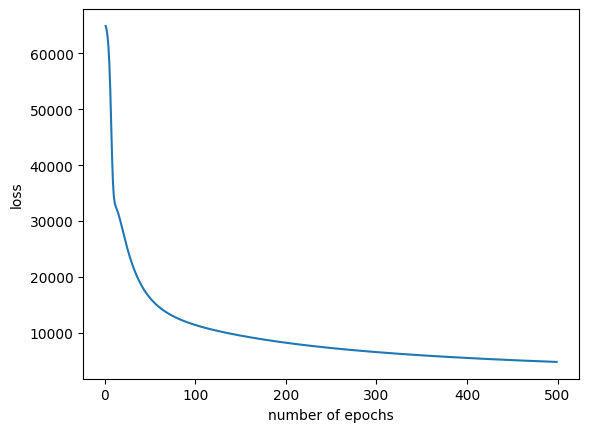

In [65]:
import math

num_features=5000
y=[int(l == "positive") for l in labels_train]
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 500
lr=0.4
logistic_loss=[]
num_samples=len(y)
for i in range(n_iters):
  z = M_train.dot(weights)+bias
  q = 1/(1+np.exp(-z))
  eps=0.00001
  loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))
  logistic_loss.append(loss)
  y_pred=[int(ql > 0.5) for ql in q]

  dw = (q-y).dot(M_train)/num_samples
  db = sum((q-y))/num_samples
  weights = weights - lr*dw
  bias = bias - lr*db

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")
#loss = sum(-(np.ones(len(y))*np.log2(q)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q)))

Now that we have a fitting model, we can use it to predict labels for our test items. The test reviews are in the one-hot matrix M_test. The labels for the test reviews are in the list labels_test.

Problem 4: Complete the code below so that it calculate the vector of predicted values y_test_pred for our test items.

In [ ]:
  z= ????
  q = ????
  y_test_pred=[int(ql > 0.5) for ql in q]

We can calculate accuracy for the performance of our model on the test items as follows:

In [ ]:
y_test=[int(l == "positive") for l in labels_test]
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
print(sum(acc_test)/len(acc_test))

Remember though that precision is not usually a good measure and so we calculate precision and recall.

Problem 5 : Calculate precision and recall values for the performance of our model on the test data. I have given code for calculating the true positive rate. You will need to calculate the rest of the values from the confusion matrix and then use these numbers to calculate our evaluation metrics.

In [ ]:
labels_test_pred=["positive" if s == 1 else "negative" for s in y_test_pred]

In [ ]:
true_positives=sum([int(yp == "positive" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])

Problem 6: Calculate precision and recall values for the performance of the model on the training data. How do the numbers differ from those you found for the test set? Why do you think this is?